In [ ]:
#Following Libries installed
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("All required libraries are installed and imported successfully!")

All required libraries are installed and imported successfully!


# Step 1: Understand Dataset

In [86]:
# Load the dataset
df = pd.read_csv('all_youtube_analytics.csv')

# Show first few rows of the dataset
print(df.head())

      video_id         day  views  redViews  comments  likes  dislikes  \
0  YuQaT52VEwo  2019-09-06    8.0       0.0       0.0    1.0       0.0   
1  YuQaT52VEwo  2019-09-07    7.0       0.0       0.0    0.0       0.0   
2  SfTEVOQP-Hk  2019-09-07    6.0       0.0       0.0    0.0       0.0   
3  YuQaT52VEwo  2019-09-08    4.0       0.0       0.0    0.0       0.0   
4  SfTEVOQP-Hk  2019-09-08    2.0       0.0       0.0    0.0       0.0   

   videosAddedToPlaylists  videosRemovedFromPlaylists  shares  ...  \
0                     0.0                         0.0     0.0  ...   
1                     1.0                         0.0     0.0  ...   
2                     2.0                         0.0     0.0  ...   
3                     0.0                         0.0     0.0  ...   
4                     0.0                         0.0     0.0  ...   

   annotationClicks  annotationCloses  cardClickRate  cardTeaserClickRate  \
0               0.0               0.0            0.0     

# Step 2: Handling missing Values

In [87]:
# Check missing values
print(df.isnull().sum())

# Understand basic statistics of the dataset
print(df.describe())


video_id                          0
day                               0
views                             0
redViews                          0
comments                          0
likes                             0
dislikes                          0
videosAddedToPlaylists            0
videosRemovedFromPlaylists        0
shares                            0
estimatedMinutesWatched           0
estimatedRedMinutesWatched        0
averageViewDuration               0
averageViewPercentage             0
annotationClickThroughRate        0
annotationCloseRate               0
annotationImpressions             0
annotationClickableImpressions    0
annotationClosableImpressions     0
annotationClicks                  0
annotationCloses                  0
cardClickRate                     0
cardTeaserClickRate               0
cardImpressions                   0
cardTeaserImpressions             0
cardClicks                        0
cardTeaserClicks                  0
subscribersGained           

In [88]:
# Fill missing numeric columns with 0
df.fillna(0, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)


# Step 3: Sorting the Data

In [89]:
# Sort videos by the number of views
sorted_df = df.sort_values(by='views', ascending=False)
print(sorted_df[['video_id', 'views']].head(10))  # Display top 10 most viewed videos


           video_id   views
174271  A-OTZ3uYQ7Y  8818.0
174039  A-OTZ3uYQ7Y  8514.0
177329  A-OTZ3uYQ7Y  8211.0
193810  A-OTZ3uYQ7Y  7834.0
193655  A-OTZ3uYQ7Y  7813.0
172910  A-OTZ3uYQ7Y  7704.0
174803  A-OTZ3uYQ7Y  7699.0
178688  A-OTZ3uYQ7Y  7494.0
182085  A-OTZ3uYQ7Y  7416.0
194294  A-OTZ3uYQ7Y  7380.0


 # Step 4: Group Data by Date


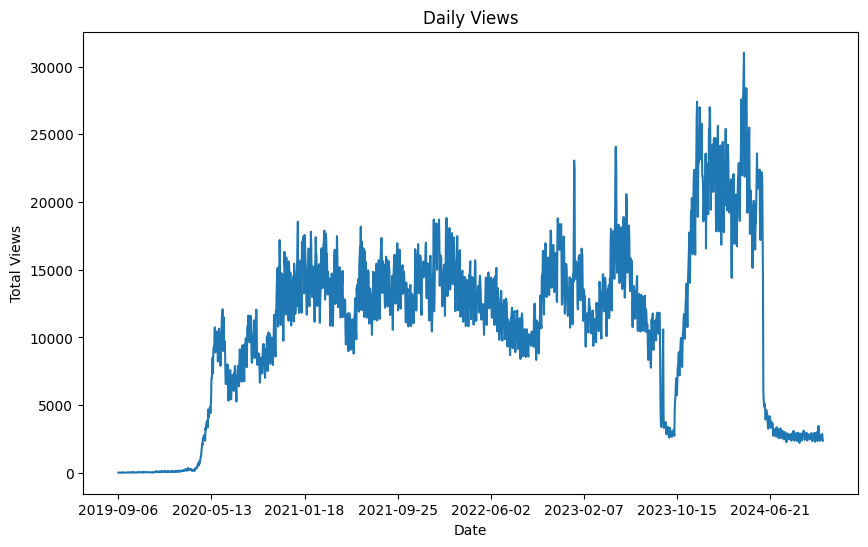

In [91]:
# Group by day and calculate total views for each day
daily_views = df.groupby('day')['views'].sum()

# Plot daily views
daily_views.plot(figsize=(10, 6), title='Daily Views', ylabel='Total Views', xlabel='Date')
plt.show()


# Step 5: Analyze Engagement Rates


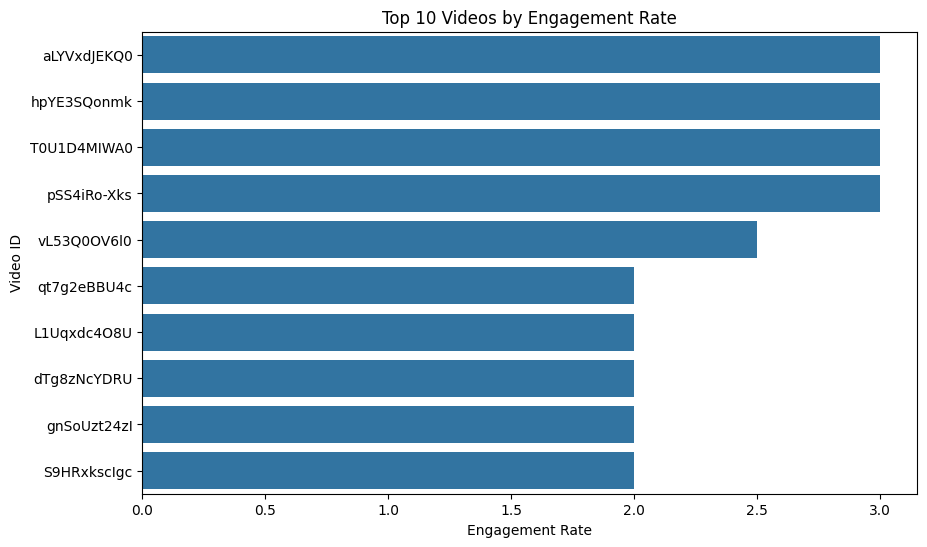

In [101]:
df = df[df['views'] > 0]  # Remove rows where views are zero
df['engagement_rate'] = (df['likes'] + df['comments'] + df['shares']) / df['views']

# Sort videos by engagement rate and get top 10
high_engagement = df.sort_values(by='engagement_rate', ascending=False).head(10)

# Plot the top 10 videos with highest engagement rate
plt.figure(figsize=(10, 6))
sns.barplot(x='engagement_rate', y='video_id', data=high_engagement)
plt.title('Top 10 Videos by Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Video ID')
plt.show()

# Step 6: Analyze view and likes


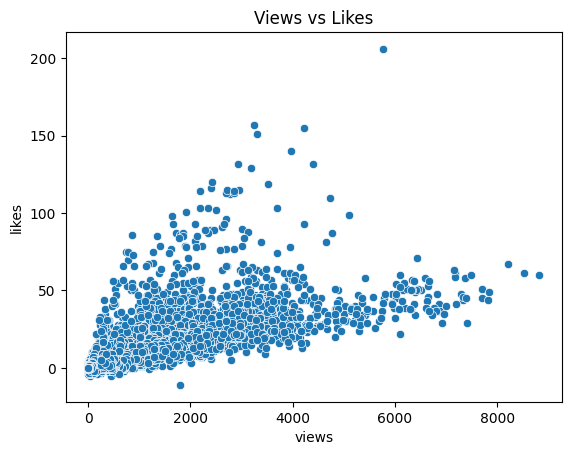

In [95]:
# Scatter plot of views vs likes
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs Likes')
plt.show()


# Step 7: Analyze Average View Percentage

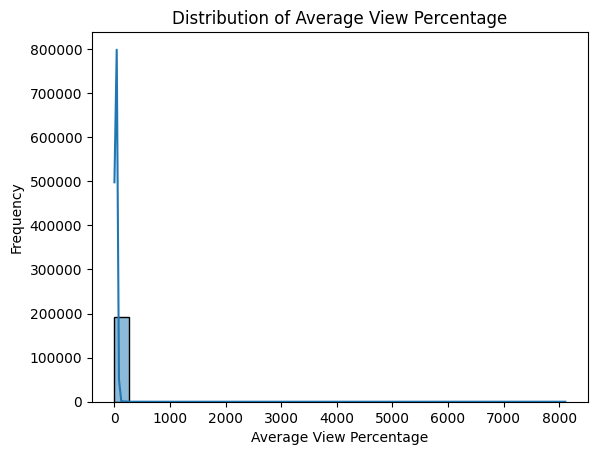

In [102]:
# Plot distribution of average view percentage
sns.histplot(df['averageViewPercentage'], kde=True, bins=30)
plt.title('Distribution of Average View Percentage')
plt.xlabel('Average View Percentage')
plt.ylabel('Frequency')
plt.show()


# Step 8: Explore Subscriber Growth


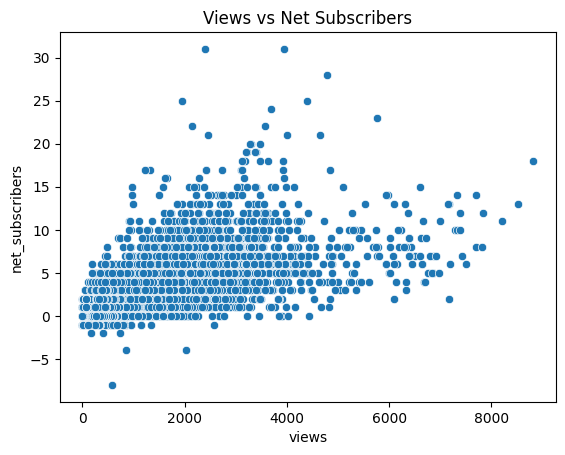

Correlation between Views and Net Subscribers: 0.7719702018144885


In [106]:
# Calculate net subscribers (gained - lost)
df['net_subscribers'] = df['subscribersGained'] - df['subscribersLost']

# Plot views vs. net subscribers
sns.scatterplot(x='views', y='net_subscribers', data=df)
plt.title('Views vs Net Subscribers')
plt.show()

# Calculate correlation between views and net subscribers
print('Correlation between Views and Net Subscribers:', df['views'].corr(df['net_subscribers']))


# Step 9: Generate a Summary Report

In [107]:
# Summarize key metrics for each video
summary = df[['video_id', 'views', 'likes', 'comments', 'shares', 'averageViewDuration', 'engagement_rate']]
print(summary.head())


      video_id  views  likes  comments  shares  averageViewDuration  \
0  YuQaT52VEwo    8.0    1.0       0.0     0.0               1208.0   
1  YuQaT52VEwo    7.0    0.0       0.0     0.0                509.0   
2  SfTEVOQP-Hk    6.0    0.0       0.0     0.0               2351.0   
3  YuQaT52VEwo    4.0    0.0       0.0     0.0               3495.0   
4  SfTEVOQP-Hk    2.0    0.0       0.0     0.0               3629.0   

   engagement_rate  
0            0.125  
1            0.000  
2            0.000  
3            0.000  
4            0.000  


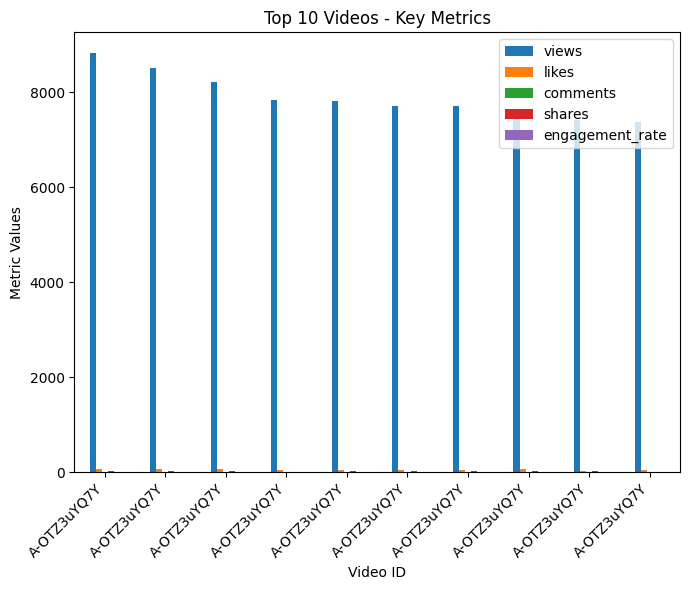

In [114]:
# Summarize key metrics for each video
summary = df[['video_id', 'views', 'likes', 'comments', 'shares', 'averageViewDuration', 'engagement_rate']]

# Sort by views to get the top 10 videos
top_videos = summary.sort_values(by='views', ascending=False).head(10)

# Plot bar chart for Views, Likes, and Shares
top_videos.set_index('video_id')[['views', 'likes', 'comments', 'shares', 'engagement_rate']].plot(kind='bar', figsize=(7, 6))

plt.title('Top 10 Videos - Key Metrics')
plt.ylabel('Metric Values')
plt.xlabel('Video ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
